# Import Libraries

In [3]:
import numpy as np 
import pandas as pd
import sklearn 

In [4]:
data = {
    'size': ['XL', 'L', 'M', np.nan, 'M','M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'boght': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,boght
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


# Creating a copy of data

In [5]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   boght   6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes


# Checking for missing data

In [6]:
df.isnull()

,size,color,gender,price,weight,boght
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [7]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
boght     0
dtype: int64

In [8]:
df.isnull().sum().sum()

5

In [9]:
df.isnull().sum() / len(df)

size      0.166667
color     0.000000
gender    0.166667
price     0.166667
weight    0.333333
boght     0.000000
dtype: float64

# SimpleImputer

In [12]:
from sklearn.impute import SimpleImputer

# strategy: 'mean', 'median', 'most_frequent', 'constant'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['weight']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [14]:
imputer.statistics_

array([415.])

In [15]:
imputer.transform(df[['weight']])

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [17]:
df['weight'] = imputer.transform(df[['weight']])
df

,size,color,gender,price,weight,boght
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [18]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', 
                        fill_value=99.0)
imputer.fit_transform(df[['price']])

array([[199.],
       [ 89.],
       [ 99.],
       [129.],
       [ 79.],
       [ 89.]])

In [19]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', 
                        fill_value='L')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['M'],
       ['M']], dtype=object)

In [20]:
df

,size,color,gender,price,weight,boght
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [22]:
df=df_raw.copy()
df

,size,color,gender,price,weight,boght
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [23]:
df.isnull().sum

<bound method DataFrame.sum of     size  color  gender  price  weight  boght
0  False  False   False  False   False  False
1  False  False   False  False   False  False
2  False  False    True   True   False  False
3   True  False   False  False    True  False
4  False  False   False  False   False  False
5  False  False   False  False    True  False>

In [24]:
pd.isnull(df['weight'])

0    False
1    False
2    False
3     True
4    False
5     True
Name: weight, dtype: bool

In [25]:
df[pd.isnull(df['weight'])]

,size,color,gender,price,weight,boght
3,NaN,green,female,129.0,NaN,no
5,M,green,male,89.0,NaN,no


In [26]:
df[~pd.isnull(df['weight'])]

,size,color,gender,price,weight,boght
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [29]:
pd.notnull(df['weight'])

0     True
1     True
2     True
3    False
4     True
5    False
Name: weight, dtype: bool

In [30]:
df

,size,color,gender,price,weight,boght
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [32]:
df.fillna(value='No_data')

,size,color,gender,price,weight,boght
0,XL,red,female,199,500,yes
1,L,green,male,89,450,no
2,M,blue,No_data,No_data,300,yes
3,No_data,green,female,129,No_data,no
4,M,red,female,79,410,yes
5,M,green,male,89,No_data,no


In [33]:
df.fillna(value=0.0)

,size,color,gender,price,weight,boght
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,0,0.0,300.0,yes
3,0,green,female,129.0,0.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,0.0,no


In [35]:
df['size'].fillna(value='L', inplace=True)
df

,size,color,gender,price,weight,boght
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [36]:
df.dropna()

,size,color,gender,price,weight,boght
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


# Missing data in time series

#  Generating data

In [4]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
data_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00',
                           periods = 10)

df = pd.DataFrame(data=data, index = data_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


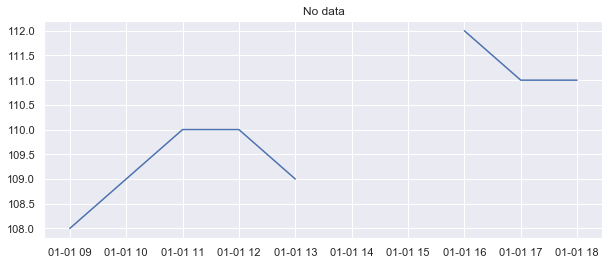

In [5]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters()
sns.set()

plt.figure(figsize=(10, 4))
plt.title('No data')
_ = plt.plot(df.price)

In [10]:
import plotly.express as px

df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width=600, height=500,
        title= 'Missing data in time series')

# Removing missing data

In [9]:
df_plotly = df_plotly.dropna()
px.line(df_plotly, 'index', 'price', width=600, height=500,
        title='Missing data in time series')

# Filling gaps with constant 0

In [11]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(0)
px.line(df_plotly, 'index', 'price_fill', width=600,height=600,
       title='Filling gaps with constant 0')

# Filling gaps by mean

In [13]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price_fill', width=600, height = 600,
       title = 'Filling gaps by mean')

# Interpolate

In [14]:
df_plotly =df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].interpolate()
px.line(df_plotly, 'index', 'price_fill', width=600, height=500,
       title='Filling missing data by Interpolate')

# Forward fill

In [ ]:
df_plotly =df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='ffill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=500,
       title='Filling missing data by Interpolate')